Introduction: We are Team Thomas Greville, with members:
Yazda Cokgor (yscokgor@berkeley.edu, GIT username: yscokgor)
etc.

Topic & GOur topic is the analysis of AIDS/ HIVs in Botswana.
als: 

Our project focused on anthe effect of AIDS/  HIV on populations, the difference in AIDS/ HIV prevelance on the sexes, on agriculture and exploring why this may be the case and how it differs in opposed to Zimbabwe.

Enjoy our code!1]

[Goal 2]

In [38]:
#Installation of datahubs necessary
%pip install wbdata
import wbdata

%pip install cufflinks
import cufflinks as cf
cf.go_offline()

import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np

#Botswana Code is "BWA"
#Zimbabwe Code is "ZWE"

def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Getting Indicator for Gender Statistics 
wbdata.get_sources()

gen_stats = 14
indicators_genstat = wbdata.get_indicators (source = gen_stats)
indicators_genstat

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [5]:
#Getting Indicator for Health Nutririon and Population Statistics 
health_nut = 16
indicators_healthnut = wbdata.get_indicators (source = health_nut)
indicators_healthnut

id                    name
--------------------  ----------------------------------------------------------------------------------------------------------------------------------------
HD.HCI.OVRL           Human Capital Index (HCI) (scale 0-1)
HD.HCI.OVRL.FE        Human Capital Index (HCI), Female (scale 0-1)
HD.HCI.OVRL.LB        Human Capital Index (HCI), Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.FE     Human Capital Index (HCI), Female, Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.MA     Human Capital Index (HCI), Male, Lower Bound (scale 0-1)
HD.HCI.OVRL.MA        Human Capital Index (HCI), Male (scale 0-1)
HD.HCI.OVRL.UB        Human Capital Index (HCI), Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.FE     Human Capital Index (HCI), Female, Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.MA     Human Capital Index (HCI), Male, Upper Bound (scale 0-1)
NY.GNP.PCAP.CD        GNI per capita, Atlas method (current US$)
SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender parity index (GPI)
SE.ADT

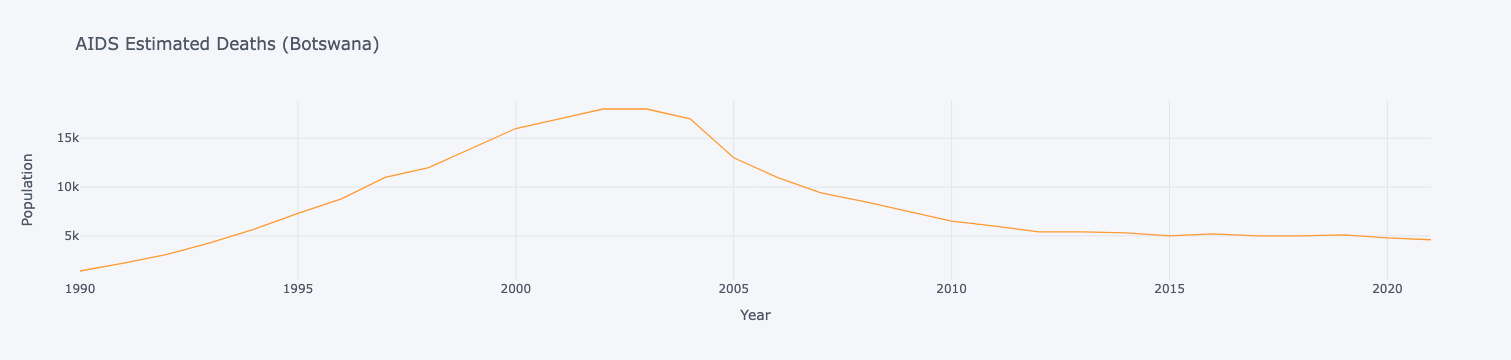

In [6]:
#Aids Estimated Deaths Plotted (Botswana)

aids_death = {"SH.DYN.AIDS.DH" : "BWA"}
aids = wbdata.get_dataframe(aids_death, country = "BWA")
aids.index = aids.index.astype(int)
aids = aids .dropna().sort_index()
aids.iplot(title="AIDS Estimated Deaths (Botswana)",xTitle='Year',yTitle='Population')

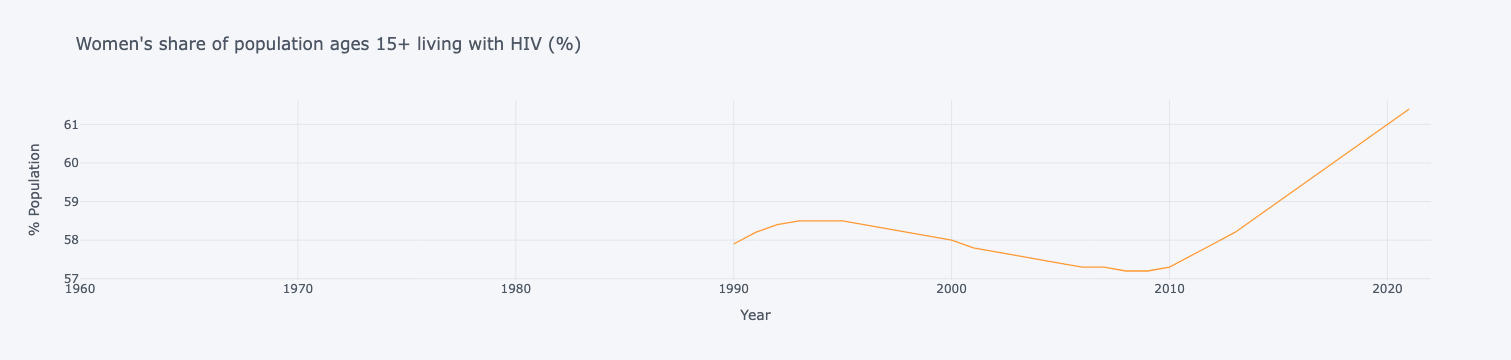

In [7]:
# Women's share of population ages 15+ living with HIV (%) (Botswana)

woman_hiv = {"SH.DYN.AIDS.FE.ZS" : "BWA"}
whiv = wbdata.get_dataframe(woman_hiv, country = "BWA")

whiv.index = whiv.index.astype(int)
whiv.iplot(title="Women's share of population ages 15+ living with HIV (%)",xTitle='Year',yTitle='% Population')


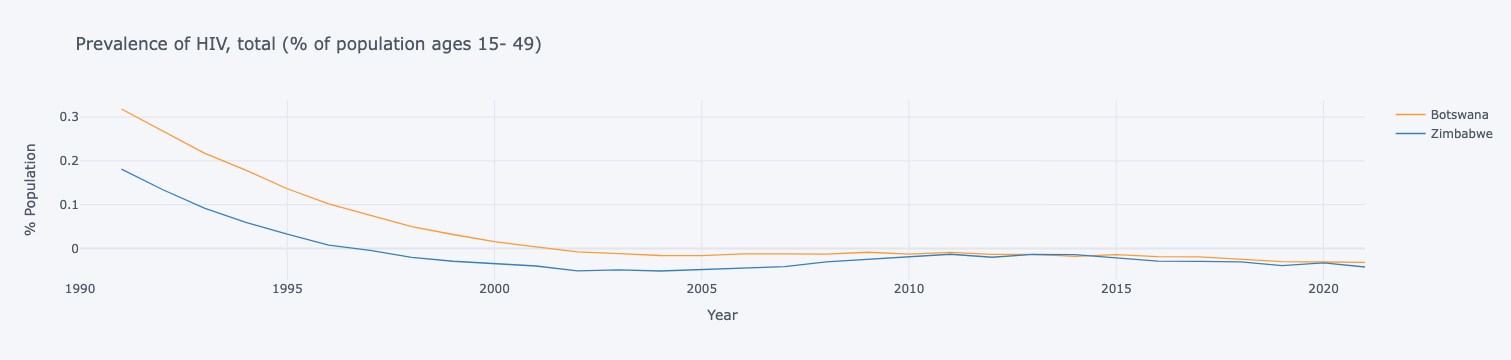

In [8]:
#prevelance of HIV total (% of population ages 15- 49) for both Botswana and Zimbabwe

labels = {"SH.DYN.AIDS.ZS" : "Prevelance of HIV, total (% of population ages 15 - 49)"}

countries =  {"BWA" : "Botswana",
            "ZWE" : "Zimbabwe",
           }

data = wbdata.get_dataframe(labels, country = countries).squeeze().dropna()

data = data.unstack('country')
data.index = data.index.astype(int)
data = data.sort_index()

np.log(data).diff().iplot(title = "Prevalence of HIV, total (% of population ages 15- 49)",
                          yTitle = "% Population",
                          xTitle = "Year")

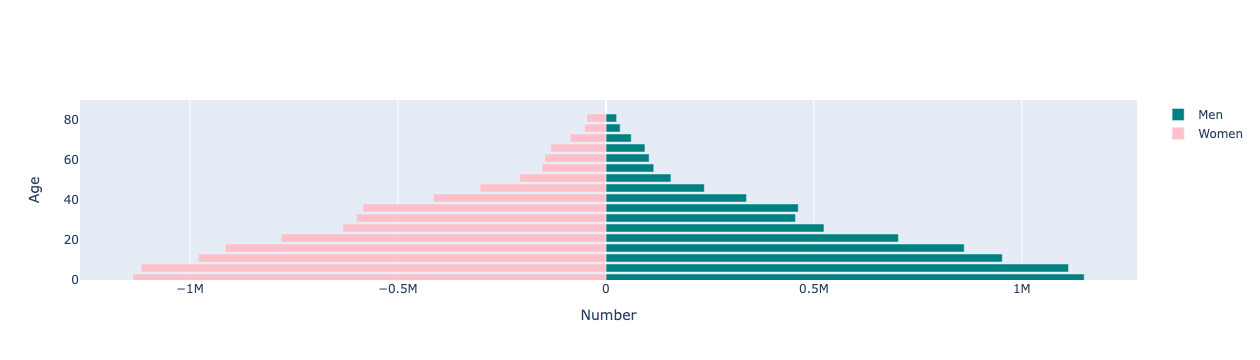

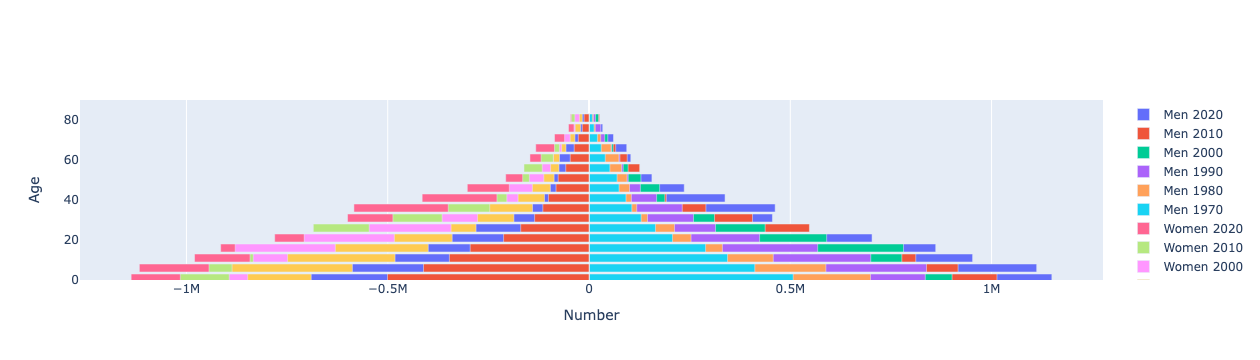

In [10]:
#defining a bunch of functions 
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

#defining pop_pyramid_df to transform the data into the correct dataframe 
def pop_pyramid_df(years, ctry):
    age_rangez = []

    #calculates age ranged based on years given parameter 
    for i in years:
        age_rangez.append(f"{i:02d}"+f"{i+4:02d}")
    
    age_rangez.append("80UP")

    #gets the male variable dictionary and combines with the female variable dictionary 
    male_variablez = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_rangez}
    female_variablez = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_rangez}
    
    #combines dictionarys 
    variablez = male_variablez
    variablez.update(female_variablez)
    
    #filters data and returns new data frame and list of age ranges 
    dfz = wbdata.get_dataframe(variablez,country=ctry)
    return dfz.query("date=='2020'").sum(axis=0), dfz, age_rangez

#calling function
result, dfz, age_rangez = pop_pyramid_df(range(0,80,5), "ZWE")


py.init_notebook_mode(connected=True)

#defining function to graph population pyramid 
def graph_pop_pyramid(dataframe, age_range, year, color1, color2):
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

    binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_range],
               orientation='h',
               name='Men',
               marker=dict(color=color1),
               hoverinfo='skip'
               ),

        go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_range],
               orientation='h',
               name='Women',
               marker=dict(color=color2),
               hoverinfo='skip',
               )
        ]
    return py.iplot(dict(data=binz, layout=layout))

#calling graph_pop_pyramid on values found for Zimbabwe
graph_pop_pyramid(dfz, age_rangez, 2020, 'teal', 'pink')

#defining a new function to graph population pyramid for multiple years 
def graph_pop_pyramid_years(dataframe, age_range, years):
    
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))
    
    binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
                   y = [int(s[:2])+1 for s in age_rangez],
                   orientation='h',
                   name='Men {:d}'.format(year),
                   hoverinfo='skip'
                  )
            for year in years]

    binz += [go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
                    y=[int(s[:2])+1 for s in age_range],
                    orientation='h',
                    name='Women {:d}'.format(year),
                    hoverinfo='skip',
                   )
             for year in years]
    return py.iplot(dict(data=binz, layout=layout))

#calling graph_pop_pyramid_years on values found for Zimbabwe
graph_pop_pyramid_years(dfz, age_rangez, range(2020,1960, -10))


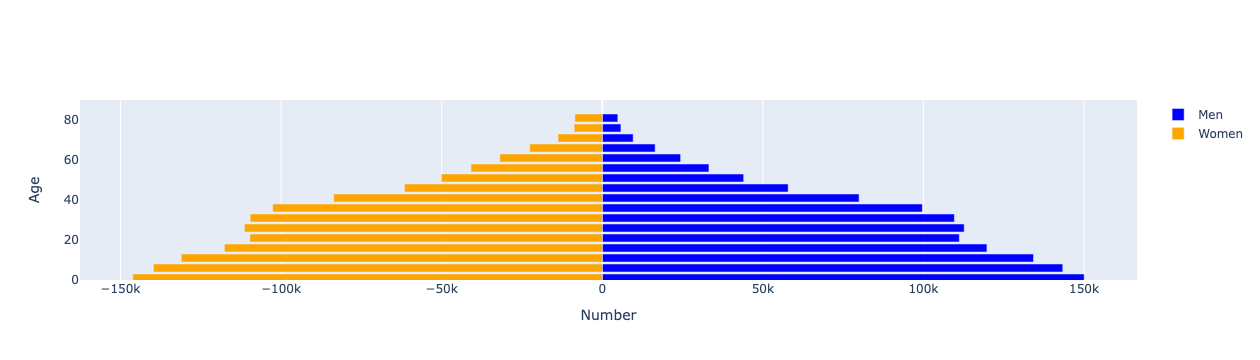

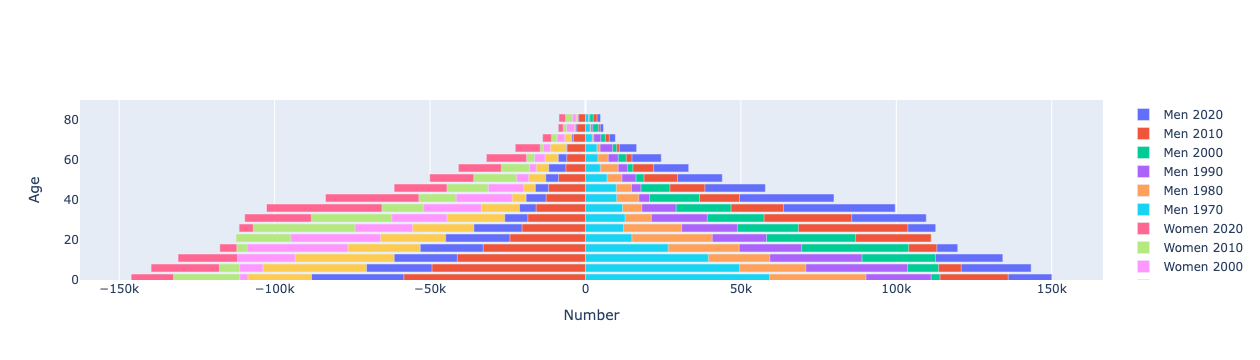

In [11]:
#calling pop_pyramid_df on Botswana 
result, dfz, age_rangez = pop_pyramid_df(range(0,80,5), "BWA")

py.init_notebook_mode(connected=True)

#calling graph_pop_pyramid on newly defined fpr Botswana dfz
graph_pop_pyramid(dfz, age_rangez, 2020, 'blue', 'orange')

#calling graph_pop_pyramid_years on newly defined for Botswana dfz
graph_pop_pyramid_years(dfz, age_rangez, range(2020,1960, -10))

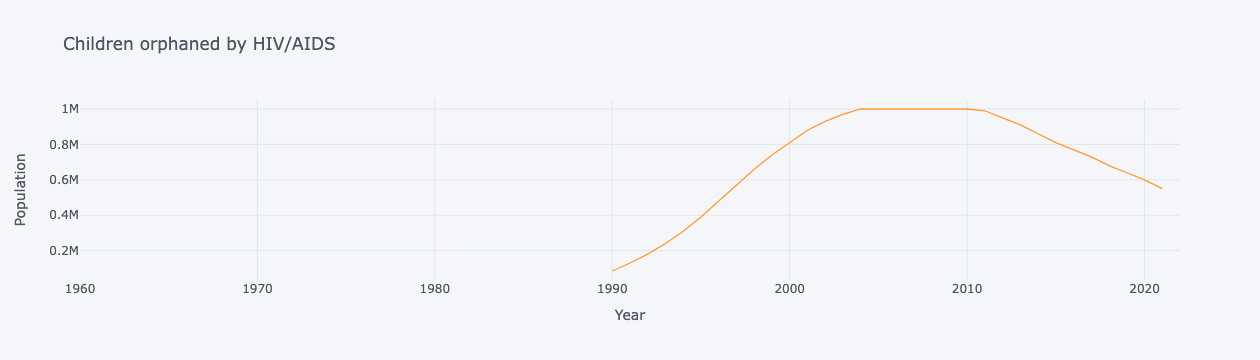

In [12]:
#children in Zimbabwe oprhaned by AIDS/ HIV
orphan_rate= {"SH.HIV.ORPH" : "ZWE"}
orphan = wbdata.get_dataframe(orphan_rate, country = "ZWE")

orphan.index = orphan.index.astype(int)
orphan.iplot(title="Children orphaned by HIV/AIDS",xTitle='Year',yTitle='Population')

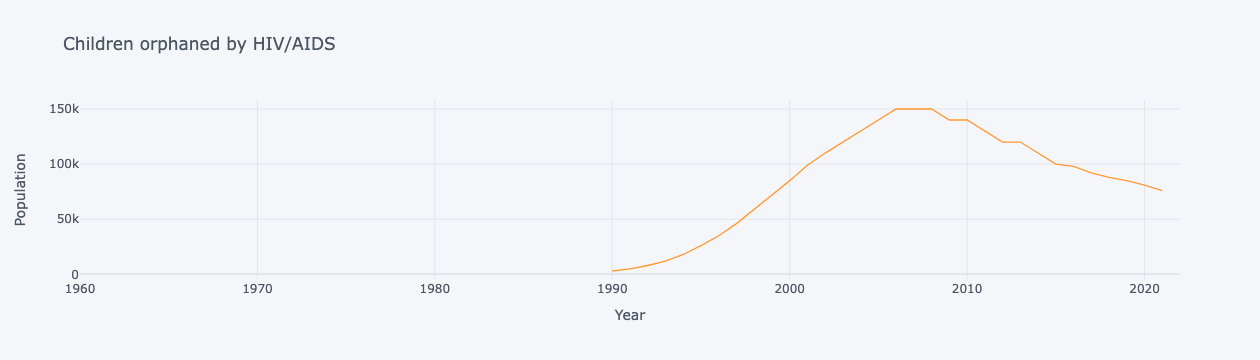

In [13]:
#children in Botswana orphaned by HIV/AIDS
orphan_rateB= {"SH.HIV.ORPH" : "BWA"}
orphanB = wbdata.get_dataframe(orphan_rate, country = "BWA")

orphanB.index = orphanB.index.astype(int)
orphanB.iplot(title="Children orphaned by HIV/AIDS",xTitle='Year',yTitle='Population')

In [16]:
from eep153_tools.sheets import read_sheets
from functools import cache
import pandas as pd 

@cache
def get_ag_data():
    """Read a bunch of google worksheets into a dictionary of dataframes"""
    data = read_sheets('https://docs.google.com/spreadsheets/d/1IL9BYacvhs6oIOAnp2KWYdTsoqIqReA2jGRlpheB9kQ/',sheet='Wide format data')

    Data = {'Country':'Country/territory','WDI Code':'ISO3','Year':'Year','Output':'Outall_Index','TFP':'TFP_Index','Land':'Land_Index','Labor':'Labor_Index','Capital':'Capital_Index','Materials':'Materials_Index'}

    df = data.rename(columns={v:k for k,v in Data.items()})
    df = df[Data.keys()].set_index(['WDI Code','Country','Year'])

    # Deal with some duplicate indices (drops regions)
    df = df.loc[~df.index.duplicated(),:]

    return df

In [17]:
import cufflinks as cf
cf.go_offline()

df = get_ag_data()

Key available for students@eep153.iam.gserviceaccount.com.


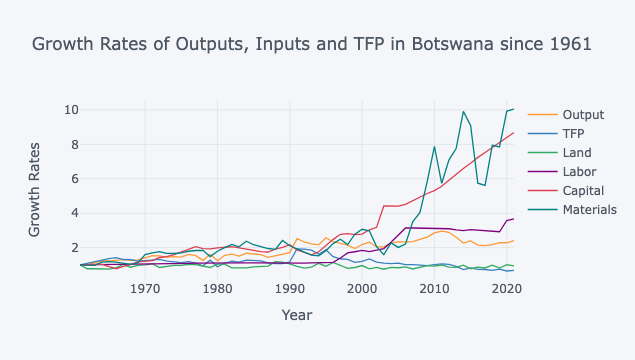

In [19]:
select = df.xs('BWA',level='WDI Code').dropna(how='any')

# Drop unnecessary index levels
select = select.droplevel(['Country'])

dselect = np.log(select).diff()
dselect['Inputs'] = dselect['Output'] - dselect['TFP']

select = df.xs('BWA',level='WDI Code').dropna(how='any').droplevel(['Country'])

select = select/select.loc[1961,:]
select.iplot(xTitle="Year", yTitle="Growth Rates", title="Growth Rates of Outputs, Inputs and TFP in Botswana since 1961")

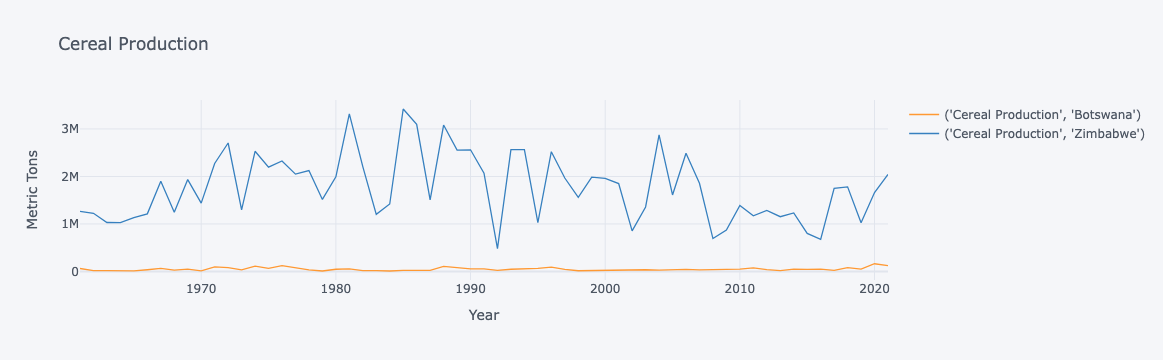

In [32]:
vars= {"AG.PRD.CREL.MT": "Cereal production"}

use = ["ZWE"]

vars= {"AG.PRD.CREL.MT": "Cereal production"}

use = ["BWA"]

cereals = fix_date_index(wbdata.get_dataframe(vars, country=use))


cereals = fix_date_index(wbdata.get_dataframe(vars, country=use))

labels = {"AG.PRD.CREL.MT": "Cereal Production"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
data=wbdata.get_dataframe(labels, country = countries).dropna()
data=data.unstack('country')
data.index=data.index.astype(int)
data=data.sort_index()
data.iplot(title= "Cereal Production", yTitle= "Metric Tons", xTitle= "Year")


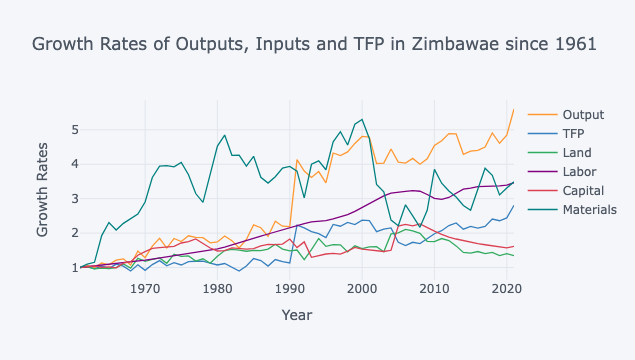

In [21]:
select = df.xs('ZWE',level='WDI Code').dropna(how='any').droplevel(['Country'])

select = select/select.loc[1961,:]
select.iplot(xTitle="Year", yTitle="Growth Rates", title="Growth Rates of Outputs, Inputs and TFP in Zimbawae since 1961")

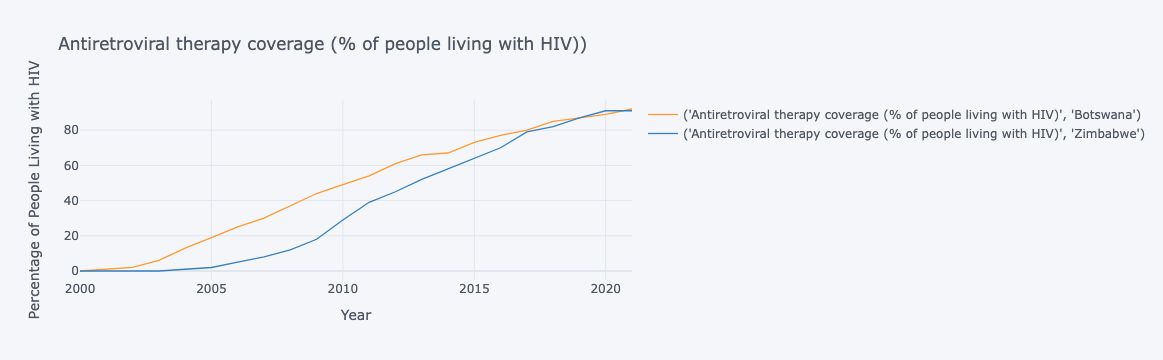

In [31]:

labels = {"SH.HIV.ARTC.ZS": "Antiretroviral therapy coverage (% of people living with HIV)"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
wdata=wbdata.get_dataframe(labels, country = countries).dropna()
wdata=wdata.unstack('country')
wdata.index=wdata.index.astype(int)
wdata=wdata.sort_index()
wdata.iplot(title= "Antiretroviral therapy coverage (% of people living with HIV))", yTitle= "Percentage of People Living with HIV", xTitle= "Year")

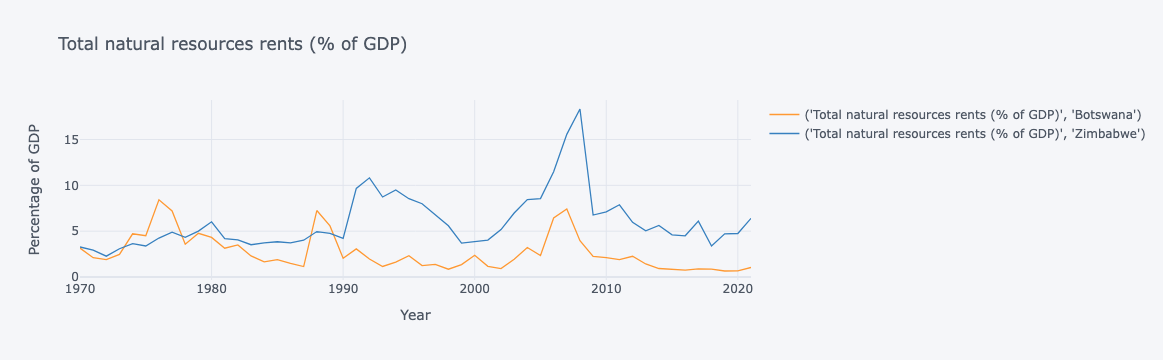

In [30]:
labels = {"NY.GDP.TOTL.RT.ZS": "Total natural resources rents (% of GDP)"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
data=wbdata.get_dataframe(labels, country = countries).dropna()
data=data.unstack('country')
data.index=data.index.astype(int)
data=data.sort_index()
data.iplot(title= "Total natural resources rents (% of GDP)", yTitle= "Percentage of GDP", xTitle= "Year")


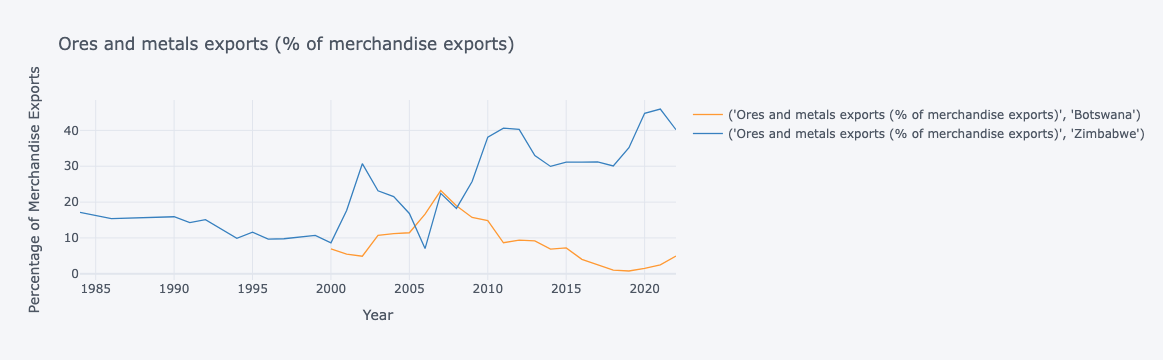

In [29]:
labels = {"TX.VAL.MMTL.ZS.UN": "Ores and metals exports (% of merchandise exports)"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
data=wbdata.get_dataframe(labels, country = countries).dropna()
data=data.unstack('country')
data.index=data.index.astype(int)
data=data.sort_index()
data.iplot(title= "Ores and metals exports (% of merchandise exports)", yTitle= "Percentage of Merchandise Exports", xTitle= "Year")


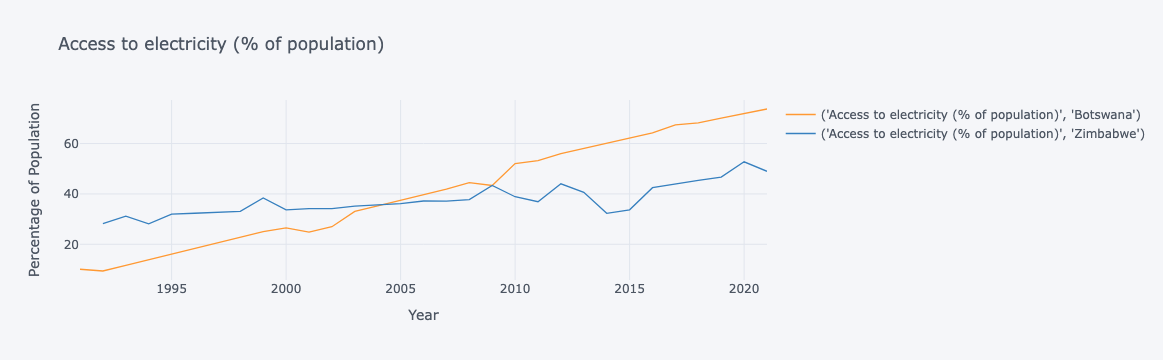

In [28]:


vars= {"EG.ELC.ACCS.ZS": "Access to electricity (% of population))"}

use = ["ZWE"]

vars= {"EG.ELC.ACCS.ZS": "Access to electricity (% of population))"}

use = ["BWA"]

belectricity = fix_date_index(wbdata.get_dataframe(vars, country=use)).dropna()

belectricity = fix_date_index(wbdata.get_dataframe(vars, country=use)).dropna()
labels = {"EG.ELC.ACCS.ZS": "Access to electricity (% of population)"}
countries={"BWA" : "Botswana", "ZWE" : "Zimbabwe" , }
data=wbdata.get_dataframe(labels, country = countries).dropna()
data=data.unstack('country')
data.index=data.index.astype(int)
data=data.sort_index()
data.iplot(title= "Access to electricity (% of population)", yTitle= "Percentage of Population", xTitle= "Year")

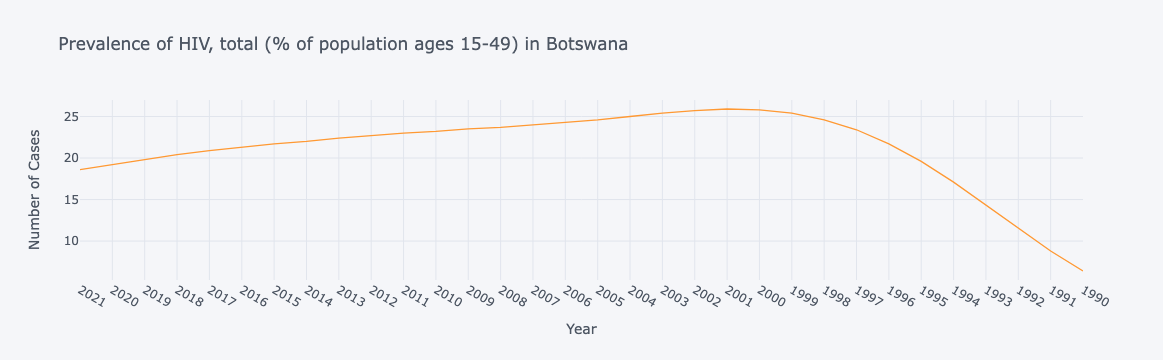

In [35]:
import matplotlib.pyplot as plt
indicator2 = "SH.DYN.AIDS.ZS"
country_code = "BWA"

data_bot = wbdata.get_dataframe(indicators={indicator2: 'value'}, country=country_code).dropna()
data_bot.head()
data_bot.iplot(title="Prevalence of HIV, total (% of population ages 15-49) in Botswana",xTitle='Year',yTitle='Number of Cases')


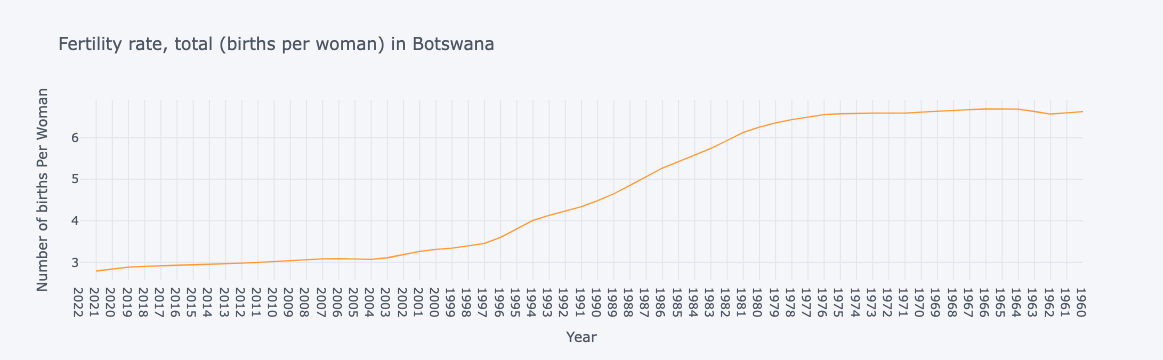

In [36]:
indicator3 = "SP.DYN.TFRT.IN"
country_code = "BWA"

data_fert = wbdata.get_dataframe(indicators={indicator3: 'Total Births Per Woman'}, country=country_code)
data_fert.iplot(title="Fertility rate, total (births per woman) in Botswana",xTitle='Year',yTitle='Number of births Per Woman')

<Axes: xlabel='date'>

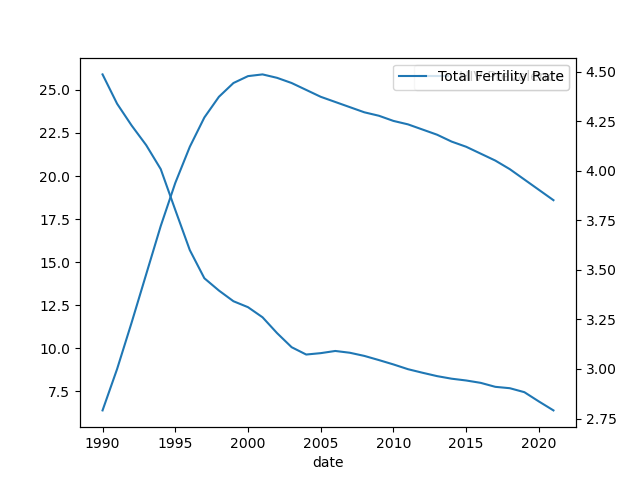

In [40]:
indicators = {"SH.DYN.AIDS.ZS":'HIV Prevalence',
              "SP.DYN.TFRT.IN":'Total Fertility Rate'}
country_code = "BWA"

data_bot = wbdata.get_dataframe(indicators=indicators, country=country_code).dropna()

data_bot = data_bot.sort_index()

fig,ax = plt.subplots()

data_bot.reset_index().plot(x='date',y='HIV Prevalence',ax=ax)

ax2 = ax.twinx()

data_bot.reset_index().plot(x='date',y='Total Fertility Rate',ax=ax2)

<Axes: xlabel='date'>

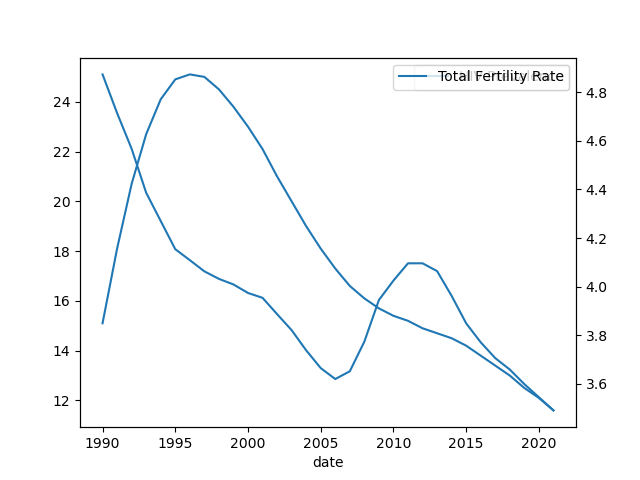

In [42]:
import wbdata
import matplotlib.pyplot as plt
%matplotlib widget

indicators = {"SH.DYN.AIDS.ZS":'HIV Prevalence',
              "SP.DYN.TFRT.IN":'Total Fertility Rate'}
country_code = "ZWE"

data_zim = wbdata.get_dataframe(indicators=indicators, country=country_code).dropna()

data_zim = data_zim.sort_index()

fig,ax = plt.subplots()

data_zim.reset_index().plot(x='date',y='HIV Prevalence',ax=ax)

ax2 = ax.twinx()

data_zim.reset_index().plot(x='date',y='Total Fertility Rate',ax=ax2)

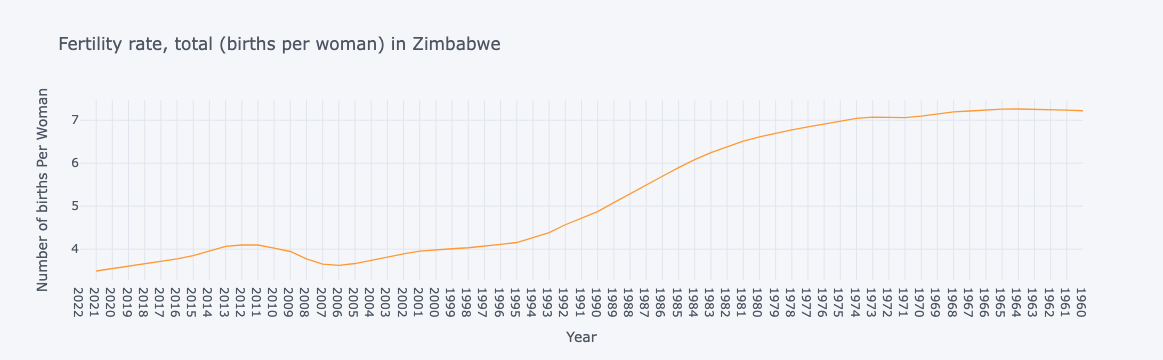

In [43]:
indicator3 = "SP.DYN.TFRT.IN"
country_codezim = "ZWE"

data_fertzim = wbdata.get_dataframe(indicators={indicator3: 'Total Births Per Woman'}, country=country_code)

data_fertzim.head()

data_fertzim.iplot(title="Fertility rate, total (births per woman) in Zimbabwe",xTitle='Year',yTitle='Number of births Per Woman')

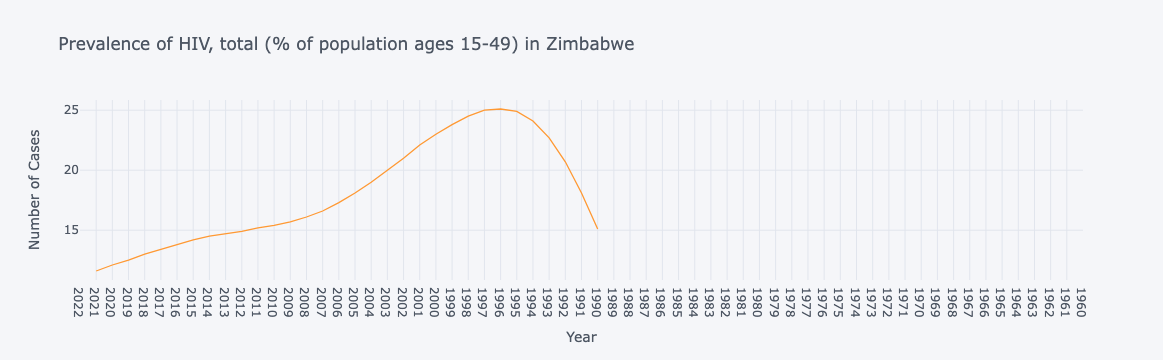

In [45]:
import matplotlib.pyplot as plt
indicator6 = "SH.DYN.AIDS.ZS"
country_code = "ZWE"

data_zim_prevelance = wbdata.get_dataframe(indicators={indicator6: 'value'}, country=country_code)

data_zim_prevelance.head()
data_zim_prevelance.iplot(title="Prevalence of HIV, total (% of population ages 15-49) in Zimbabwe",xTitle='Year',yTitle='Number of Cases')

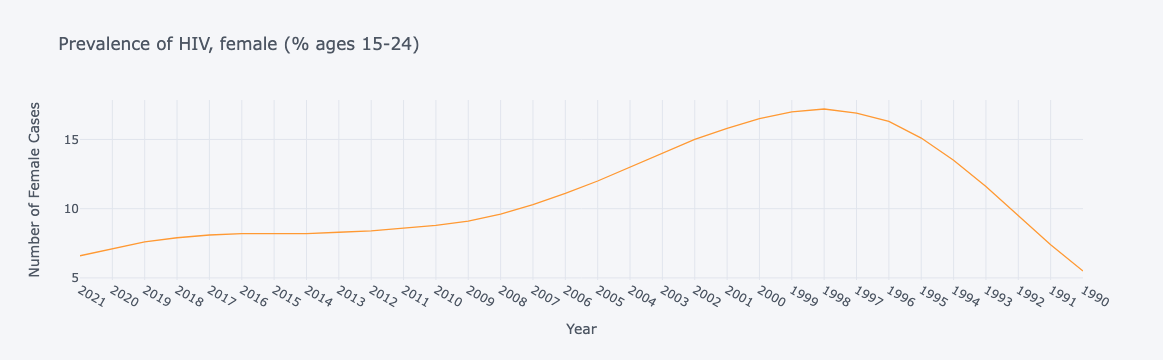

In [47]:
indicatorwomen = "SH.HIV.1524.FE.ZS"
country_codewomen = "BWA"

data_women = wbdata.get_dataframe(indicators={indicatorwomen: 'Prevalence of HIV, female (% ages 15-24)'}, country=country_codewomen).dropna()

data_women.head()
data_women.iplot(title="Prevalence of HIV, female (% ages 15-24)",xTitle='Year',yTitle='Number of Female Cases')

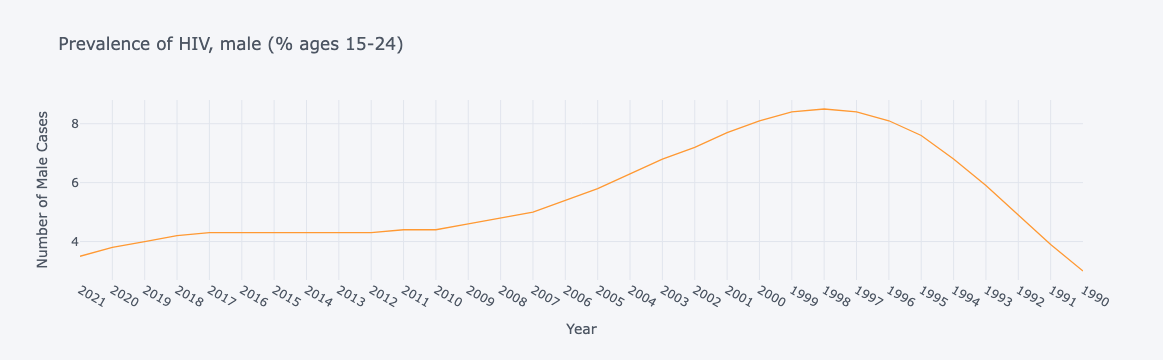

In [49]:
indicatormen = "SH.HIV.1524.MA.ZS"
country_codemen = "BWA"

data_men = wbdata.get_dataframe(indicators={indicatormen: 'Prevalence of HIV, male (% ages 15-24)'}, country=country_codemen).dropna()

data_men.head()
data_men.iplot(title="Prevalence of HIV, male (% ages 15-24)",xTitle='Year',yTitle='Number of Male Cases')

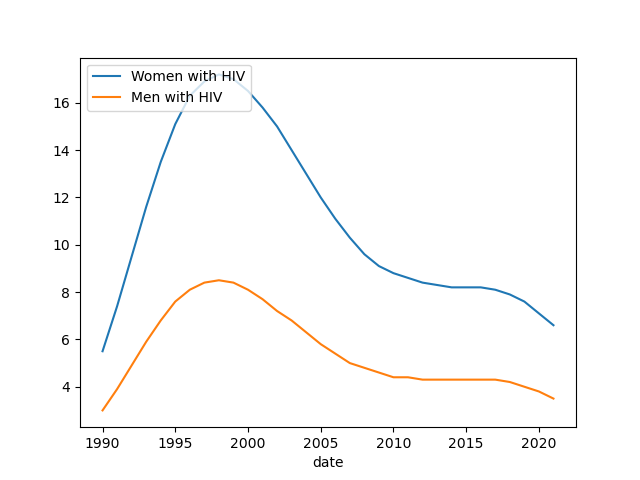

In [50]:
indicatorsgender = {"SH.HIV.1524.FE.ZS":'Women with HIV',
              "SH.HIV.1524.MA.ZS":'Men with HIV'}
country_code_gender = "BWA"

data_gender = wbdata.get_dataframe(indicators=indicatorsgender, country=country_code_gender).dropna()

data_gender = data_gender.sort_index()
data_gender

data_gender.columns = ['Women with HIV', 'Men with HIV']

data_gender = data_gender.sort_index()

# Plot both lines on the same graph
fig, ax = plt.subplots()

data_gender.reset_index().plot(x='date', y='Women with HIV', ax=ax, label='Women with HIV')
data_gender.reset_index().plot(x='date', y='Men with HIV', ax=ax, label='Men with HIV')

ax.legend(loc='upper left')
plt.show()

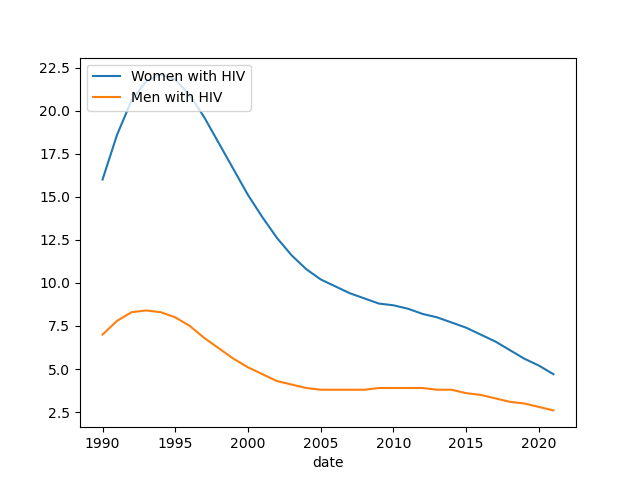

In [52]:
indicatorsgender = {"SH.HIV.1524.FE.ZS":'Women with HIV',
              "SH.HIV.1524.MA.ZS":'Men with HIV'}
country_code_gender_zim = "ZWE"

data_gender_zim = wbdata.get_dataframe(indicators=indicatorsgender, country=country_code_gender_zim).dropna()

data_gender_zim = data_gender_zim.sort_index()
data_gender_zim.columns = ['Women with HIV', 'Men with HIV']

data_gender_zim = data_gender_zim.sort_index()

# Plot both lines on the same graph
fig, ax = plt.subplots()

data_gender_zim.reset_index().plot(x='date', y='Women with HIV', ax=ax, label='Women with HIV')
data_gender_zim.reset_index().plot(x='date', y='Men with HIV', ax=ax, label='Men with HIV')

ax.legend(loc='upper left')
plt.show()